In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/Users/ademoshood/Desktop/MSDUK Test/BasicCompanyData-2023-07-01-part7_7.csv')

/var/folders/38/3k5fgrt94yl1svhsr968ngdh0000gn/T/ipykernel_38892/3706172681.py:1: DtypeWarning: Columns (43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'/Users/ademoshood/Desktop/MSDUK Test/BasicCompanyData-2023-07-01-part7_7.csv')


In [3]:
data.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,VISION PACK LTD,10831327,NaN,NaN,6-8 MANVERS ROAD,SWALLOWNEST,SHEFFIELD,NaN,UNITED KINGDOM,S26 4UD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2023,18/07/2022
1,VISION PAINT & DESIGN LIMITED,05628705,NaN,NaN,9 FAIRLOP AVENUE,NaN,CANVEY ISLAND,ESSEX,NaN,SS8 9DX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/11/2023,03/11/2022
2,VISION PAINT SPRAYING LIMITED,10947174,NaN,NaN,UNIT 4F MANOR BUSINESS PARK,WOODFORD HALSE,DAVENTRY,NaN,ENGLAND,NN11 3UB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18/09/2021,04/09/2020
3,VISION PARATUS LTD,14906975,NaN,NaN,71-75 SHELTON STREET,COVENT GARDEN,LONDON,NaN,UNITED KINGDOM,WC2H 9JQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/06/2024,NaN
4,VISION PARK CYGNET MANAGEMENT COMPANY LIMITED,05747663,NaN,NaN,"4 OFFICE VILLAGE FORDER WAY, CYGNET PARK",HAMPTON,PETERBOROUGH,CAMBRIDGESHIRE,ENGLAND,PE7 8GX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/04/2024,31/03/2023


In [4]:
data.shape

(259638, 55)

In [5]:
#Check for NaN under the "CompanyCategory" DataFrame column
data['CompanyCategory'].isnull().values.any()

False

In [6]:
#Search for string "Private Limited Company" irrespective of case by passing False to the case parameter.
#By default, the pd.series.str.contains() function’s string searches are case sensitive.
Data_Company_Category = data[data.CompanyCategory.str.contains("Private Limited Company", regex=False, case=False)]
Data_Company_Category.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,VISION PACK LTD,10831327,NaN,NaN,6-8 MANVERS ROAD,SWALLOWNEST,SHEFFIELD,NaN,UNITED KINGDOM,S26 4UD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2023,18/07/2022
1,VISION PAINT & DESIGN LIMITED,05628705,NaN,NaN,9 FAIRLOP AVENUE,NaN,CANVEY ISLAND,ESSEX,NaN,SS8 9DX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/11/2023,03/11/2022
2,VISION PAINT SPRAYING LIMITED,10947174,NaN,NaN,UNIT 4F MANOR BUSINESS PARK,WOODFORD HALSE,DAVENTRY,NaN,ENGLAND,NN11 3UB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18/09/2021,04/09/2020
3,VISION PARATUS LTD,14906975,NaN,NaN,71-75 SHELTON STREET,COVENT GARDEN,LONDON,NaN,UNITED KINGDOM,WC2H 9JQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/06/2024,NaN
5,VISION PARK MANAGEMENT LIMITED,02479238,NaN,NaN,50/60 STATION ROAD,NaN,CAMBRIDGE,NaN,ENGLAND,CB1 2JH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/12/2023,10/12/2022


In [7]:
Data_Company_Category.shape

(238550, 55)

In [8]:
Report_1 = pd.DataFrame(Data_Company_Category, columns=['CompanyCategory'])
Report_1.head()

,CompanyCategory
0,Private Limited Company
1,Private Limited Company
2,Private Limited Company
3,Private Limited Company
5,Private Limited Company


In [9]:
Report_1.describe()

,CompanyCategory
count,238550
unique,1
top,Private Limited Company
freq,238550


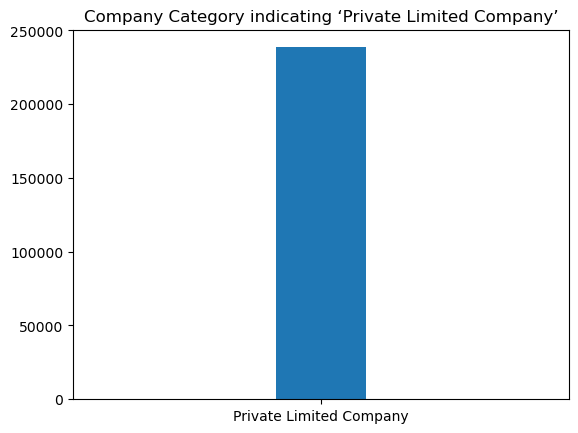

In [30]:
plt.hist(Report_1, bins=5)
plt.title('Company Category indicating ‘Private Limited Company’')
plt.show()

In [44]:
Data_Company_Category.to_csv(r'C:\Users\ademoshood\Desktop\Company Category indicating Private Limited Company.csv', index=False, header=True)

In [11]:
#Check for NaN under the "CompanyStatus" DataFrame column
data['CompanyStatus'].isnull().values.any()

False

In [12]:
#Search for string "Active" irrespective of case by passing False to the case parameter.
#By default, the pd.series.str.contains() function’s string searches are case sensitive.
Data_Company_Status = data[data.CompanyStatus.str.contains("Active", regex=False, case=False)]
Data_Company_Status.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,VISION PACK LTD,10831327,NaN,NaN,6-8 MANVERS ROAD,SWALLOWNEST,SHEFFIELD,NaN,UNITED KINGDOM,S26 4UD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2023,18/07/2022
1,VISION PAINT & DESIGN LIMITED,05628705,NaN,NaN,9 FAIRLOP AVENUE,NaN,CANVEY ISLAND,ESSEX,NaN,SS8 9DX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/11/2023,03/11/2022
2,VISION PAINT SPRAYING LIMITED,10947174,NaN,NaN,UNIT 4F MANOR BUSINESS PARK,WOODFORD HALSE,DAVENTRY,NaN,ENGLAND,NN11 3UB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18/09/2021,04/09/2020
3,VISION PARATUS LTD,14906975,NaN,NaN,71-75 SHELTON STREET,COVENT GARDEN,LONDON,NaN,UNITED KINGDOM,WC2H 9JQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/06/2024,NaN
4,VISION PARK CYGNET MANAGEMENT COMPANY LIMITED,05747663,NaN,NaN,"4 OFFICE VILLAGE FORDER WAY, CYGNET PARK",HAMPTON,PETERBOROUGH,CAMBRIDGESHIRE,ENGLAND,PE7 8GX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/04/2024,31/03/2023


In [13]:
Data_Company_Status.shape

(254460, 55)

In [14]:
Report_2 = pd.DataFrame(Data_Company_Status, columns=['CompanyStatus'])
Report_2.head()

,CompanyStatus
0,Active
1,Active
2,Active - Proposal to Strike off
3,Active
4,Active


In [15]:
Report_2.describe()

,CompanyStatus
count,254460
unique,2
top,Active
freq,239689


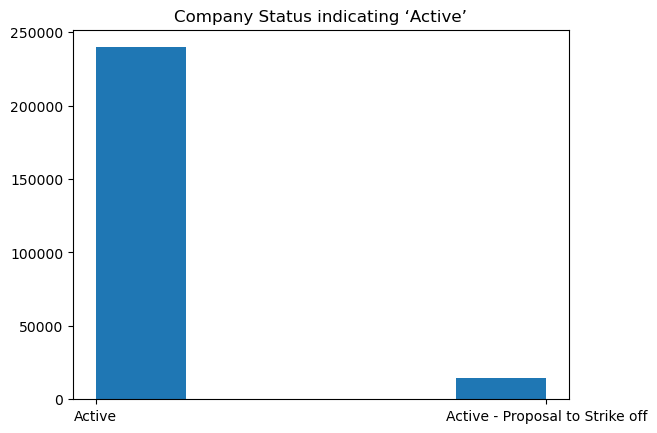

In [29]:
plt.hist(Report_2, bins=5)
plt.title('Company Status indicating ‘Active’')
plt.show()

In [45]:
Data_Company_Status.to_csv(r'C:\Users\ademoshood\Desktop\Company Status indicating Active.csv', index=False, header=True)

In [34]:
#Renaming column name from Accounts.AccountCategory to AccountCategory in Pandas
data.rename({'Accounts.AccountCategory': 'AccountCategory'}, axis=1, inplace=True)

In [35]:
#Check for NaN under the "AccountCategory" DataFrame column
data['AccountCategory'].isnull().values.any()

False

In [36]:
#Search for string "SMALL" and "MEDIUM", and  irrespective of case by passing False to the case parameter.
#By default, the pd.series.str.contains() function’s string searches are case sensitive.
Data_Accounts_Category = data[data.AccountCategory.str.contains("SMALL", regex=False, case=False)|data.AccountCategory.str.contains("MEDIUM", regex=False, case=False)]
Data_Accounts_Category.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
27,VISION PHARMACEUTICALS LTD,02175795,NaN,NaN,FERNBANK HOUSE,TYTHERINGTON BUSINESS PARK,MACCLESFIELD,CHESHIRE,NaN,SK10 2XA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/06/2024,26/05/2023
50,VISION POINT SYSTEMS LIMITED,12147162,NaN,NaN,16 GREAT QUEEN STREET,COVENT GARDEN,LONDON,NaN,UNITED KINGDOM,WC2B 5AH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21/08/2023,07/08/2022
243,VISION SOLUTIONS UK LIMITED,04858220,NaN,NaN,PEARL ASSURANCE HOUSE,319 BALLARDS LANE,LONDON,NaN,NaN,N12 8LY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/06/2023,15/06/2022
281,VISION SUPPORT BARROW & DISTRICT,03133015,NaN,NaN,67/69 CAVENDISH STREET,BARROW IN FURNESS,CUMBRIA,NaN,NaN,LA14 1QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21/01/2024,07/01/2023
284,VISION SUPPORT TRADING LIMITED,03828782,NaN,NaN,UNIT 8 CAPENHURST TECHNOLOGY PARK,CAPENHURST,CHESTER,NaN,ENGLAND,CH1 6EH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/08/2023,17/08/2022


In [37]:
Data_Accounts_Category.shape

(4080, 55)

In [38]:
Report_3 = pd.DataFrame(Data_Accounts_Category, columns=['AccountCategory'])
Report_3.head()

,AccountCategory
27,SMALL
50,SMALL
243,SMALL
281,SMALL
284,SMALL


In [39]:
Report_3.describe()

,AccountCategory
count,4080
unique,3
top,SMALL
freq,3501


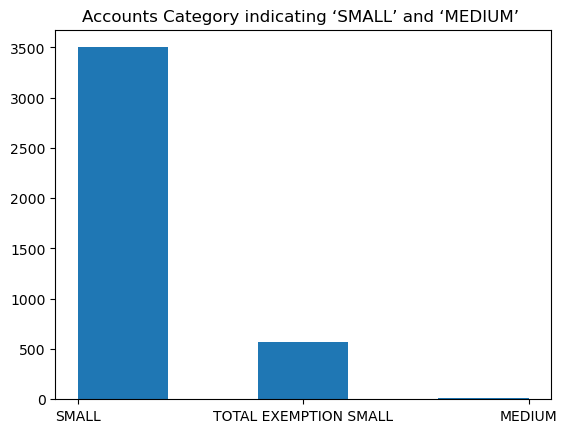

In [40]:
plt.hist(Report_3, bins=5)
plt.title('Accounts Category indicating ‘SMALL’ and ‘MEDIUM’ ')
plt.show()

In [43]:
Data_Accounts_Category.to_csv(r'C:\Users\ademoshood\Desktop\Accounts Category indicating SMALL and MEDIUM.csv', index=False, header=True)